In [37]:
import pandas as pd
import numpy as np

filepath = "/home/gustavo/Downloads/Mudança de hábitos do consumidor.csv"
data = pd.read_csv(filepath, sep=";", decimal=",")

data.head()

,Marca temporal,Idade,Gênero,Instrução,Com quem você mora?,Quantidade de pessoas que mora,Renda familiar,Eu tento reduzir meu consumo de água e energia pensando em outras pessoas,"Eu jogo o lixo em lugares adequados para manter as vias (ruas, estradas, calçadas) limpas","Em um restaurante, eu peço somente a quantidade de comida que posso comer para evitar gastos",...,"Eu compro e uso produtos que são ""environmentally friendly""",Eu me preocupo com a falta de recursos naturais,Costumo ler o rótulo de produtos para ver se existem informações sobre cuidados com o meio ambiente,Eu tento comprar alimentos orgânicos por serem menos agressivos ao meio ambiente,Eu sempre lembro que excesso de consumo pode causar falta de recursos naturais,É minha responsabilidade controlar os desejos de compras excessivas para o bem das futuras gerações,Eu passei a utilizar menos sacolas plásticas durante o período da pandemia,Eu passei a comprar mais produtos sustentáveis durante o período da pandemia,Eu passei a reciclar mais durante o período da pandemia,Eu passei a evitar mais o desperdício de comida durante o período da pandemia
0,03/08/2022 10:04,De 18 a 27 anos,Feminino,Graduação Incompleta/ Em curso,Com parentes,2.0,Superior a 10 salários mínimos,Concordo,Concordo totalmente,Concordo totalmente,...,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Discordo,Concordo,Concordo,Concordo
1,03/08/2022 10:09,De 18 a 27 anos,Masculino,Graduação Incompleta/ Em curso,Com os pais,1.0,Acima de 7 até 10 salários mínimos,Concordo,Concordo totalmente,Concordo totalmente,...,Neutro,Concordo totalmente,Discordo totalmente,Discordo totalmente,Concordo totalmente,Concordo totalmente,Discordo totalmente,Discordo totalmente,Discordo totalmente,Concordo
2,03/08/2022 10:19,De 18 a 27 anos,Masculino,Graduação,Com parentes,2.0,Acima de 7 até 10 salários mínimos,Neutro,Concordo totalmente,Concordo totalmente,...,Neutro,Concordo totalmente,Concordo,Concordo,Concordo,Concordo,Discordo,Neutro,Neutro,Neutro
3,03/08/2022 10:23,De 18 a 27 anos,Masculino,Graduação Incompleta/ Em curso,Com os pais,2.0,De 4 a 7 salários mínimos,Concordo totalmente,Concordo totalmente,Neutro,...,Concordo totalmente,Concordo totalmente,Concordo totalmente,Neutro,Concordo totalmente,Neutro,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
4,03/08/2022 10:25,De 18 a 27 anos,Feminino,Graduação Incompleta/ Em curso,Sozinho,0.0,Acima de 7 até 10 salários mínimos,Neutro,Concordo totalmente,Neutro,...,Concordo,Concordo,Concordo,Neutro,Discordo,Concordo,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente


Definindo se a pandemia afetou o consumo sustentável do consumidor

In [38]:
list(data['Idade'].unique())

['De 18 a 27 anos',
 'De 28 anos a 42 anos',
 'Mais de 42 anos',
 'Menos de 18 anos']

In [39]:
def e_consumo_sustentavel(row) -> int:
    consumo_sustentavel = {
        'Eu passei a utilizar menos sacolas plásticas durante o período da pandemia': ["Concordo", "Concordo totalmente"],
        'Eu passei a comprar mais produtos sustentáveis durante o período da pandemia': ["Concordo", "Concordo totalmente"],
        'Eu passei a reciclar mais durante o período da pandemia': ["Concordo", "Concordo totalmente"]
    }
    counter = 0
    for column, values in consumo_sustentavel.items():
        if row[column] in values:
            counter += 1
    if counter >= 3:
        return 1
    return 0

data['Consumo Sustentavel'] = data.apply(e_consumo_sustentavel, axis=1)

In [43]:
grau_de_concordancia = {
    "Discordo totalmente": 0,
    "Discordo": 1,
    "Neutro": 2,
    "Concordo": 3,
    "Concordo totalmente": 4
}
data.replace(grau_de_concordancia, inplace=True)


renda_familiar = {
    'Até 4 salários mínimos': 0,
    'De 4 a 7 salários mínimos': 1,
    'Acima de 7 até 10 salários mínimos': 2,
    'Superior a 10 salários mínimos': 3,
}
data.replace(renda_familiar, inplace=True)


idade = {
    'Menos de 18 anos': 0,
    'De 18 a 27 anos': 1,
    'De 28 anos a 42 anos': 2,
    'Mais de 42 anos': 3
}
data.replace(idade, inplace=True)


features = [
    "Idade", "Renda familiar",
    "Em um restaurante, eu peço somente a quantidade de comida que posso comer para evitar gastos",
    "Durante as compras, tento pensar se o produto adquirido pode causar qualquer dano ao meio ambiente"
]

data.replace(np.nan, -1, inplace=True)
data.replace("None", -1, inplace=True)
data.fillna(-1, inplace=True)


# Convertendo as colunas de string para int
data[features] = data[features].astype(int)

In [46]:
from sklearn.model_selection import train_test_split

# Filtrando dados para o modelo de regressão linear
features = data[features]
target = data['Consumo Sustentavel']

# Separando os dados de treino e teste
features_treino, features_teste, target_treino, target_teste = train_test_split(features, target, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

modelo_logistico = LogisticRegression()
modelo_logistico.fit(features_treino, target_treino)


def avalia_modelo_de_classificacao(modelo, features_teste, target_teste, casas_decimais=3):
    predicao = modelo.predict(features_teste)
    acuracia = metrics.accuracy_score(target_teste, predicao)
    print('Acurácia:', round(acuracia, casas_decimais))
    print('Precisão:', round(metrics.precision_score(target_teste, predicao), casas_decimais))
    print('Recall:', round(metrics.recall_score(target_teste, predicao), casas_decimais))
    print('F1 Score:', round(metrics.f1_score(target_teste, predicao), casas_decimais))

avalia_modelo_de_classificacao(modelo_logistico, features_teste, target_teste)

Acurácia: 0.875
Precisão: 0.0
Recall: 0.0
F1 Score: 0.0


/home/gustavo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


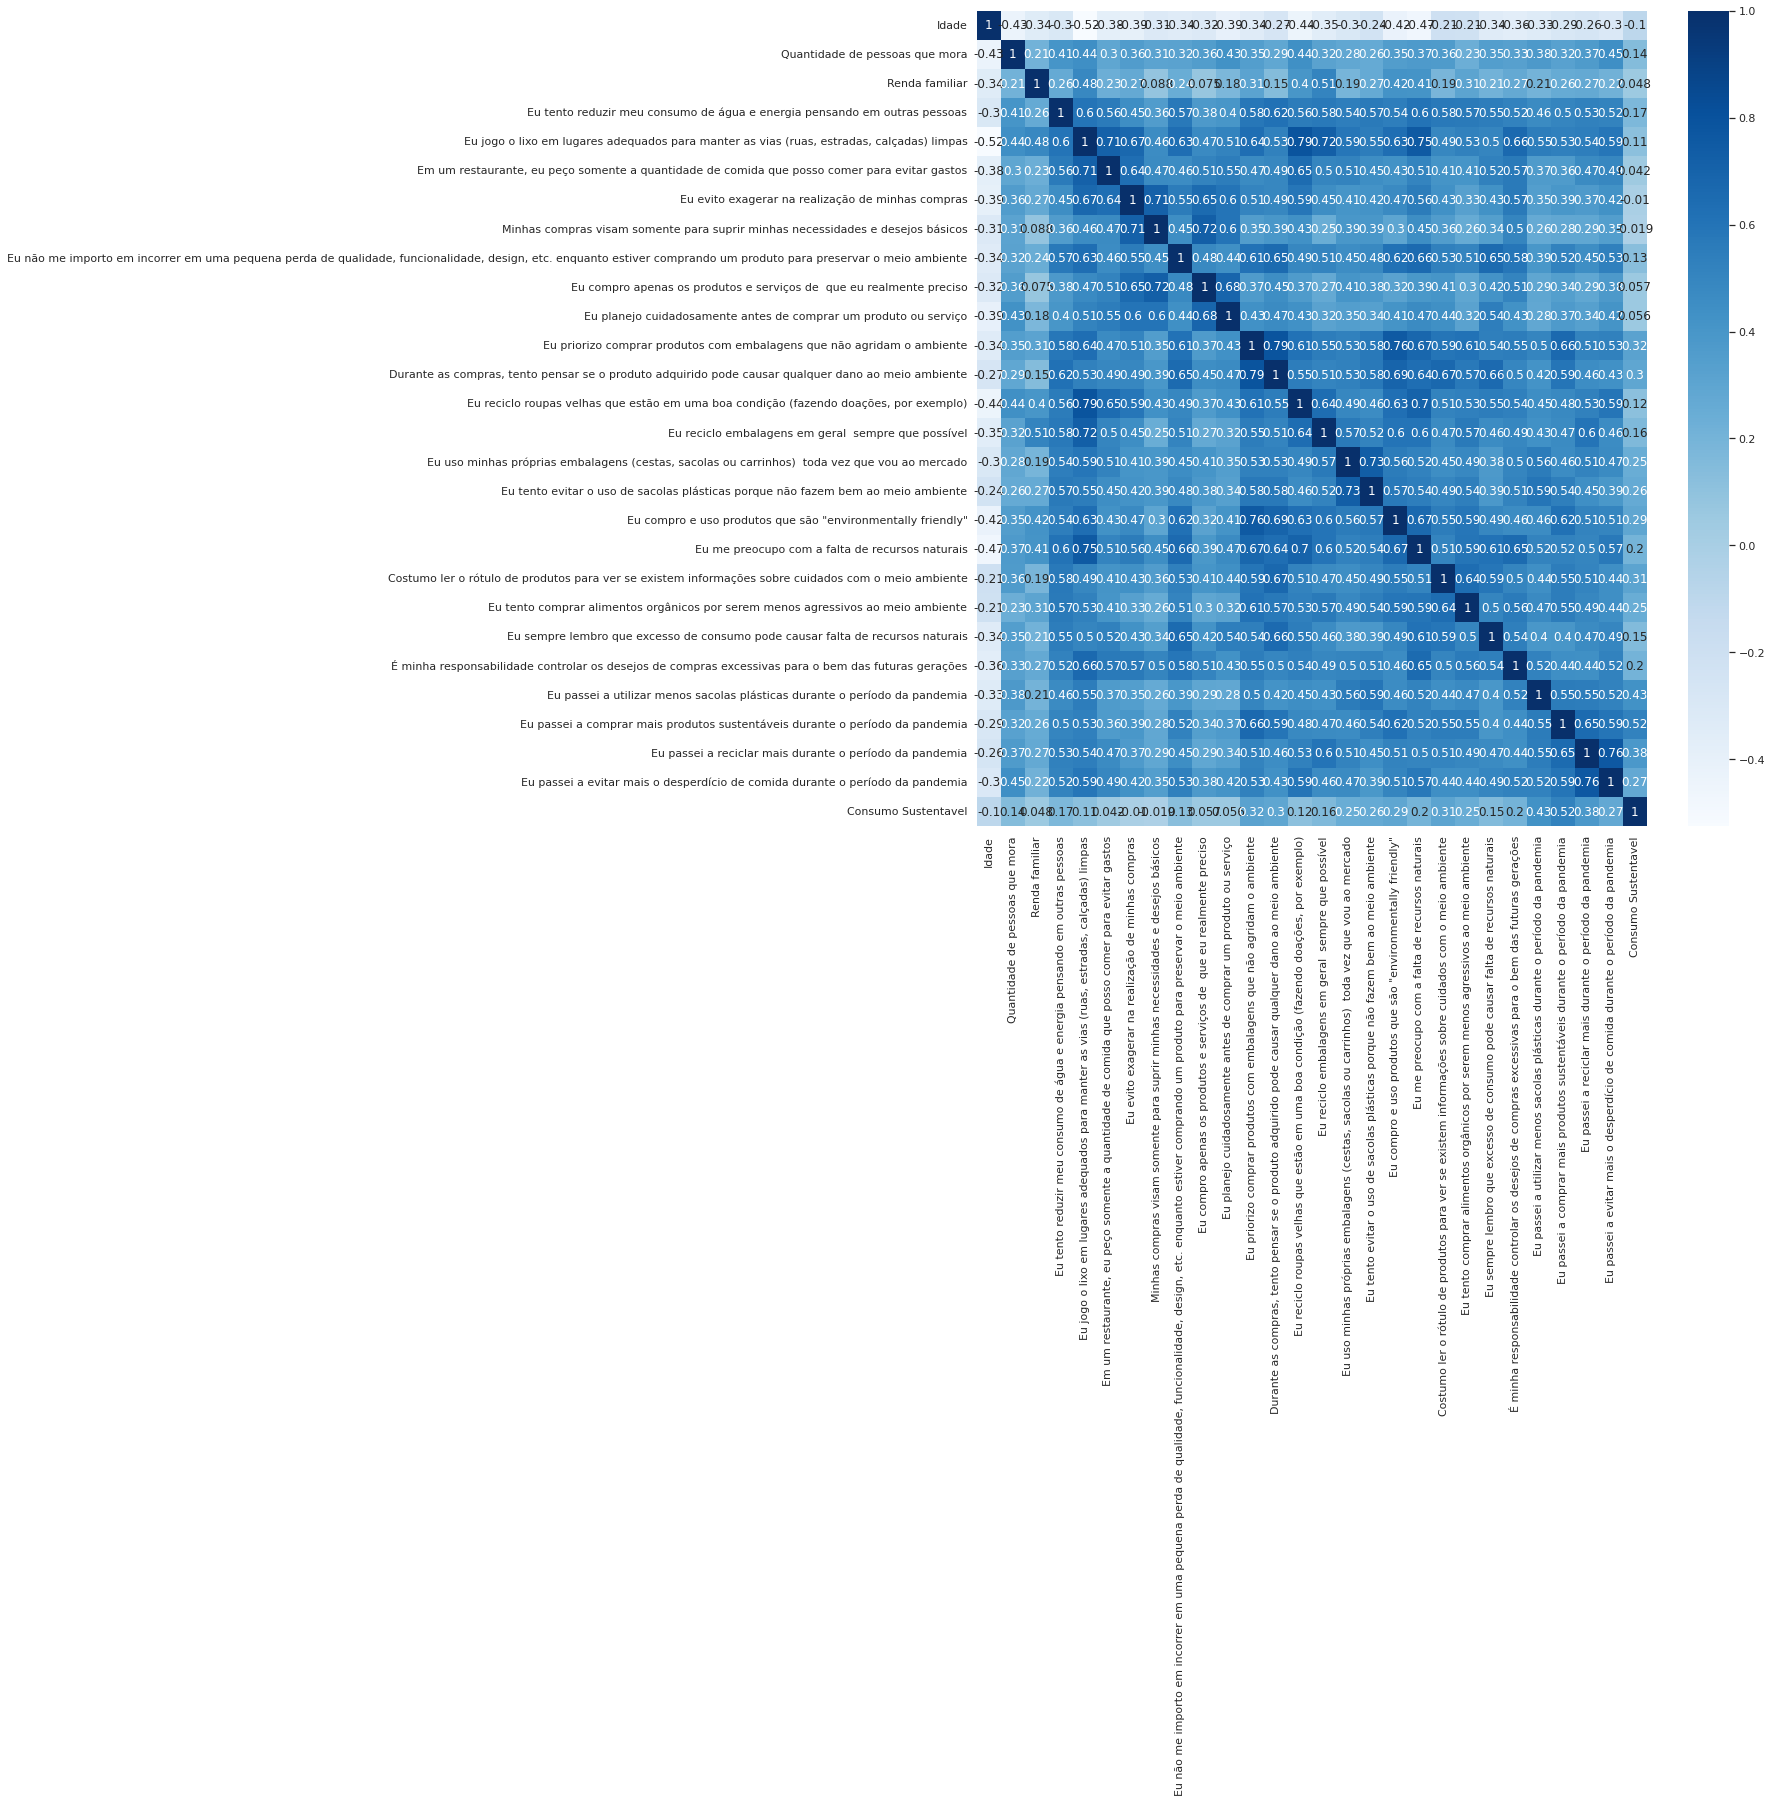

In [54]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 15)})
plot = sns.heatmap(data.corr(), annot=True, cmap='Blues')
fig = plot.get_figure()
fig.savefig('heatmap.png')